In [1]:
import pandas as pd

In [3]:
# Load the dataset
file_path = 'C:/Users/syeds/Desktop/Modules/Dissertation/corrected_data_sequential_GW_mid.xlsx'
df_mid = pd.read_excel(file_path)

In [4]:
df_mid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20418 entries, 0 to 20417
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        20418 non-null  object 
 1   position                    20418 non-null  object 
 2   team                        20418 non-null  object 
 3   xP                          20418 non-null  float64
 4   assists                     20418 non-null  int64  
 5   bonus                       20418 non-null  int64  
 6   bps                         20418 non-null  int64  
 7   clean_sheets                20418 non-null  int64  
 8   creativity                  20418 non-null  float64
 9   goals_conceded              20418 non-null  int64  
 10  goals_scored                20418 non-null  int64  
 11  ict_index                   20418 non-null  float64
 12  influence                   20418 non-null  float64
 13  kickoff_time                204

In [5]:
# Convert 'GW' column to object type (which is similar to string in pandas)
df_mid['GW'] = df_mid['GW'].astype('object')

NameError: name 'df' is not defined

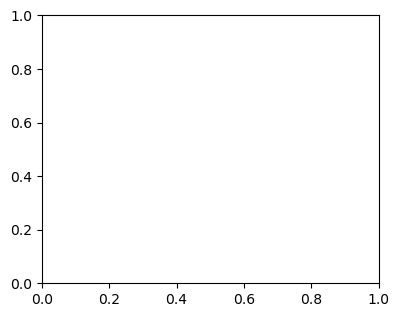

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Visualize the outliers in the Goalkeepers (GK) dataset
plt.figure(figsize=(20, 16))
numeric_columns_mid = df_mid.select_dtypes(include=['float64', 'int64']).columns

# Create subplots for each numeric feature
for i, col in enumerate(numeric_columns_mid, 1):
    plt.subplot(4, 4, i)  # Adjust grid size based on the number of features
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

# Show the plots
plt.show()

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Prepare the data for modeling
X = df_mid.drop(columns=[ 'name', 'team', 'kickoff_time', 'position', 'season', 'opponent_team','GW','next_GW_total_points'])  # Drop non-numeric columns and target
y = df_mid['next_GW_total_points']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
importances = rf_model.feature_importances_
features = X.columns

# Sort feature importance
sorted_indices = importances.argsort()[::-1]
important_features = [(features[i], importances[i]) for i in sorted_indices]

# Display feature importance
for feature, importance in important_features:
    print(f"{feature}: {importance:.4f}")

minutes: 0.2123
selected: 0.0982
transfers_in: 0.0669
value: 0.0612
xP: 0.0606
transfers_out: 0.0515
transfers_balance: 0.0490
expected_goals_conceded: 0.0413
creativity: 0.0395
threat: 0.0347
influence: 0.0344
ict_index: 0.0328
expected_assists: 0.0313
bps: 0.0304
expected_goal_involvements: 0.0265
expected_goals: 0.0250
fixture_difficulty: 0.0206
team_h_score: 0.0204
team_a_score: 0.0187
total_points: 0.0110
goals_conceded: 0.0104
was_home: 0.0066
assists: 0.0039
yellow_cards: 0.0036
bonus: 0.0024
clean_sheets: 0.0023
penalties_missed: 0.0017
goals_scored: 0.0012
starts: 0.0012
own_goals: 0.0007
red_cards: 0.0000
saves: 0.0000
penalties_saved: 0.0000


In [8]:
# Exclude non-numeric columns
numeric_columns_mid = df_mid.select_dtypes(include=['float64', 'int64'])  # Only select numeric columns

# Calculate correlation matrix with 'total_points'
correlation_matrix = numeric_columns_mid.corr()

# Sort correlation values with 'total_points'
correlation_with_total_points = correlation_matrix['next_GW_total_points'].sort_values(ascending=False)
print(correlation_with_total_points)

next_GW_total_points          1.000000
minutes                       0.441408
xP                            0.411749
starts                        0.405015
ict_index                     0.396040
threat                        0.344906
bps                           0.344152
total_points                  0.340081
creativity                    0.339421
value                         0.332851
influence                     0.320999
expected_goal_involvements    0.308989
selected                      0.302428
expected_goals_conceded       0.276186
expected_goals                0.263718
expected_assists              0.254713
goals_conceded                0.237038
transfers_in                  0.227939
clean_sheets                  0.215217
goals_scored                  0.185441
assists                       0.160342
bonus                         0.159049
transfers_out                 0.148479
yellow_cards                  0.097092
transfers_balance             0.083556
fixture_difficulty       

In [9]:
# Define the columns to drop
columns_to_drop = [
    'penalties_missed','saves','penalties_saved','own_goals', 'red_cards', 'yellow_cards','threat', 'creativity', 
    'bonus','team_a_score','team_h_score','transfers_out','transfers_in'
]

# Drop the columns from the goalkeeper dataset
df_mid_cleaned = df_mid.drop(columns=columns_to_drop)

# Check the updated dataset
print(df_mid_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20418 entries, 0 to 20417
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        20418 non-null  object 
 1   position                    20418 non-null  object 
 2   team                        20418 non-null  object 
 3   xP                          20418 non-null  float64
 4   assists                     20418 non-null  int64  
 5   bps                         20418 non-null  int64  
 6   clean_sheets                20418 non-null  int64  
 7   goals_conceded              20418 non-null  int64  
 8   goals_scored                20418 non-null  int64  
 9   ict_index                   20418 non-null  float64
 10  influence                   20418 non-null  float64
 11  kickoff_time                20418 non-null  object 
 12  minutes                     20418 non-null  int64  
 13  opponent_team               204

In [10]:
# Exclude non-numeric columns
numeric_columns_mid = df_mid_cleaned.select_dtypes(include=['float64', 'int64'])  # Only select numeric columns

# Calculate correlation matrix with 'total_points'
correlation_matrix = numeric_columns_mid.corr()

# Sort correlation values with 'total_points'
correlation_with_total_points = correlation_matrix['next_GW_total_points'].sort_values(ascending=False)
print(correlation_with_total_points)

next_GW_total_points          1.000000
minutes                       0.441408
xP                            0.411749
starts                        0.405015
ict_index                     0.396040
bps                           0.344152
total_points                  0.340081
value                         0.332851
influence                     0.320999
expected_goal_involvements    0.308989
selected                      0.302428
expected_goals_conceded       0.276186
expected_goals                0.263718
expected_assists              0.254713
goals_conceded                0.237038
clean_sheets                  0.215217
goals_scored                  0.185441
assists                       0.160342
transfers_balance             0.083556
fixture_difficulty            0.054572
Name: next_GW_total_points, dtype: float64


In [11]:
# Ensure that 'kickoff_time' is parsed as a datetime for time-series modeling
df_mid_cleaned['kickoff_time'] = pd.to_datetime(df_mid_cleaned['kickoff_time'])

# Check the new dataset
print(df_mid_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20418 entries, 0 to 20417
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   name                        20418 non-null  object             
 1   position                    20418 non-null  object             
 2   team                        20418 non-null  object             
 3   xP                          20418 non-null  float64            
 4   assists                     20418 non-null  int64              
 5   bps                         20418 non-null  int64              
 6   clean_sheets                20418 non-null  int64              
 7   goals_conceded              20418 non-null  int64              
 8   goals_scored                20418 non-null  int64              
 9   ict_index                   20418 non-null  float64            
 10  influence                   20418 non-null  float64       

In [12]:
# Sort data by player and gameweek
df_mid_final = df_mid_cleaned.sort_values(['name', 'GW'])

# List of features to compute rolling averages
features_to_roll = ['total_points', 'goals_scored','assists']

# Rolling averages for 10
for feature in features_to_roll:
    df_mid_final[f'rolling_avg_{feature}_10gw'] = df_mid_final.groupby('name')[feature].transform(lambda x: x.rolling(window=10, min_periods=1).mean())


# Check the new rolling averague columns
print(df_mid_final.head())

                 name position     team   xP  assists  bps  clean_sheets  \
0  abdoulaye doucoure      MID  Everton  1.3        0   20             1   
1  abdoulaye doucoure      MID  Everton  2.5        0   13             0   
2  abdoulaye doucoure      MID  Everton  2.0        0   12             0   
3  abdoulaye doucoure      MID  Everton  3.3        1   29             0   
4  abdoulaye doucoure      MID  Everton  2.5        0    9             0   

   goals_conceded  goals_scored  ict_index  ...  expected_assists  \
0               0             0        6.9  ...             0.112   
1               2             0        0.9  ...             0.008   
2               1             0        5.2  ...             0.132   
3               2             0        6.9  ...             0.152   
4               2             0        2.6  ...             0.042   

  expected_goal_involvements  expected_goals expected_goals_conceded  starts  \
0                      0.198           0.086    

In [13]:
# Select only numeric columns from the scaled dataframe
numeric_df_mid = df_mid_final.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix on the scaled data
correlation_matrix = numeric_df_mid.corr()

# Print the correlation matrix in text format
print("Correlation Matrix:")
print(correlation_matrix)

# You can also loop through and print correlation values in a readable format
threshold = 0.8  # You can adjust this threshold
print("\nHighly Correlated Features (correlation > 0.8):")

for col in correlation_matrix.columns:
    for idx, value in correlation_matrix[col].items():
        if abs(value) > threshold and col != idx:
            print(f"Correlation between {col} and {idx}: {value:.2f}")

Correlation Matrix:
                                     xP   assists       bps  clean_sheets  \
xP                             1.000000  0.333455  0.624522      0.338433   
assists                        0.333455  1.000000  0.511277      0.149492   
bps                            0.624522  0.511277  1.000000      0.343878   
clean_sheets                   0.338433  0.149492  0.343878      1.000000   
goals_conceded                 0.257019  0.105573  0.342247     -0.220992   
goals_scored                   0.444051  0.114572  0.704253      0.148245   
ict_index                      0.656147  0.428701  0.837012      0.350224   
influence                      0.601572  0.448338  0.923764      0.300719   
minutes                        0.593654  0.263861  0.685000      0.434803   
selected                       0.497139  0.177888  0.283181      0.160107   
total_points                   0.646980  0.539900  0.925949      0.404348   
transfers_balance              0.314173  0.061413  0.111

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the numerical features for VIF calculation
X = df_mid_final.select_dtypes(include=['float64', 'int64'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Print the VIF values
print(vif_data)

                          Feature        VIF
0                              xP   5.163105
1                         assists   6.088603
2                             bps  18.503979
3                    clean_sheets   3.037504
4                  goals_conceded   4.320667
5                    goals_scored  19.558569
6                       ict_index  13.083922
7                       influence  20.710339
8                         minutes  34.737002
9                        selected   2.074290
10                   total_points  49.370032
11              transfers_balance   1.171838
12                          value   3.350619
13               expected_assists  13.077705
14     expected_goal_involvements  51.407945
15                 expected_goals  26.925874
16        expected_goals_conceded   3.991209
17                         starts  19.855445
18             fixture_difficulty   1.198161
19           next_GW_total_points   1.895398
20  rolling_avg_total_points_10gw  27.582134
21  rollin

In [15]:
# Dropping the chosen features
df_mid_cleaned = df_mid_final.drop(columns=['minutes','expected_goal_involvements','total_points','influence','goals_scored','assists'])

# Verifying the cleaned dataframe
print(df_mid_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20418 entries, 0 to 20417
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   name                           20418 non-null  object             
 1   position                       20418 non-null  object             
 2   team                           20418 non-null  object             
 3   xP                             20418 non-null  float64            
 4   bps                            20418 non-null  int64              
 5   clean_sheets                   20418 non-null  int64              
 6   goals_conceded                 20418 non-null  int64              
 7   ict_index                      20418 non-null  float64            
 8   kickoff_time                   20418 non-null  datetime64[ns, UTC]
 9   opponent_team                  20418 non-null  object             
 10  selected              

In [16]:
# Select only numeric columns from the scaled dataframe
numeric_df_mid = df_mid_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix on the scaled data
correlation_matrix = numeric_df_mid.corr()

# Print the correlation matrix in text format
print("Correlation Matrix:")
print(correlation_matrix)

# You can also loop through and print correlation values in a readable format
threshold = 0.8  # You can adjust this threshold
print("\nHighly Correlated Features (correlation > 0.8):")

for col in correlation_matrix.columns:
    for idx, value in correlation_matrix[col].items():
        if abs(value) > threshold and col != idx:
            print(f"Correlation between {col} and {idx}: {value:.2f}")

Correlation Matrix:
                                     xP       bps  clean_sheets  \
xP                             1.000000  0.624522      0.338433   
bps                            0.624522  1.000000      0.343878   
clean_sheets                   0.338433  0.343878      1.000000   
goals_conceded                 0.257019  0.342247     -0.220992   
ict_index                      0.656147  0.837012      0.350224   
selected                       0.497139  0.283181      0.160107   
transfers_balance              0.314173  0.111235      0.076219   
value                          0.482060  0.296060      0.176179   
expected_assists               0.411349  0.512492      0.219956   
expected_goals                 0.477980  0.535887      0.210012   
expected_goals_conceded        0.355430  0.426913      0.081705   
starts                         0.563436  0.644625      0.447452   
fixture_difficulty             0.212367  0.080107      0.110536   
next_GW_total_points           0.411749  0

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the numerical features for VIF calculation
X = df_mid_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Print the VIF values
print(vif_data)

                          Feature        VIF
0                              xP   5.033170
1                             bps   5.528572
2                    clean_sheets   2.406416
3                  goals_conceded   4.127756
4                       ict_index   8.332584
5                        selected   2.060400
6               transfers_balance   1.165734
7                           value   3.307097
8                expected_assists   2.055060
9                  expected_goals   2.169636
10        expected_goals_conceded   3.779045
11                         starts   7.322684
12             fixture_difficulty   1.188905
13           next_GW_total_points   1.871626
14  rolling_avg_total_points_10gw  23.950048
15  rolling_avg_goals_scored_10gw   7.517310
16       rolling_avg_assists_10gw   3.911802


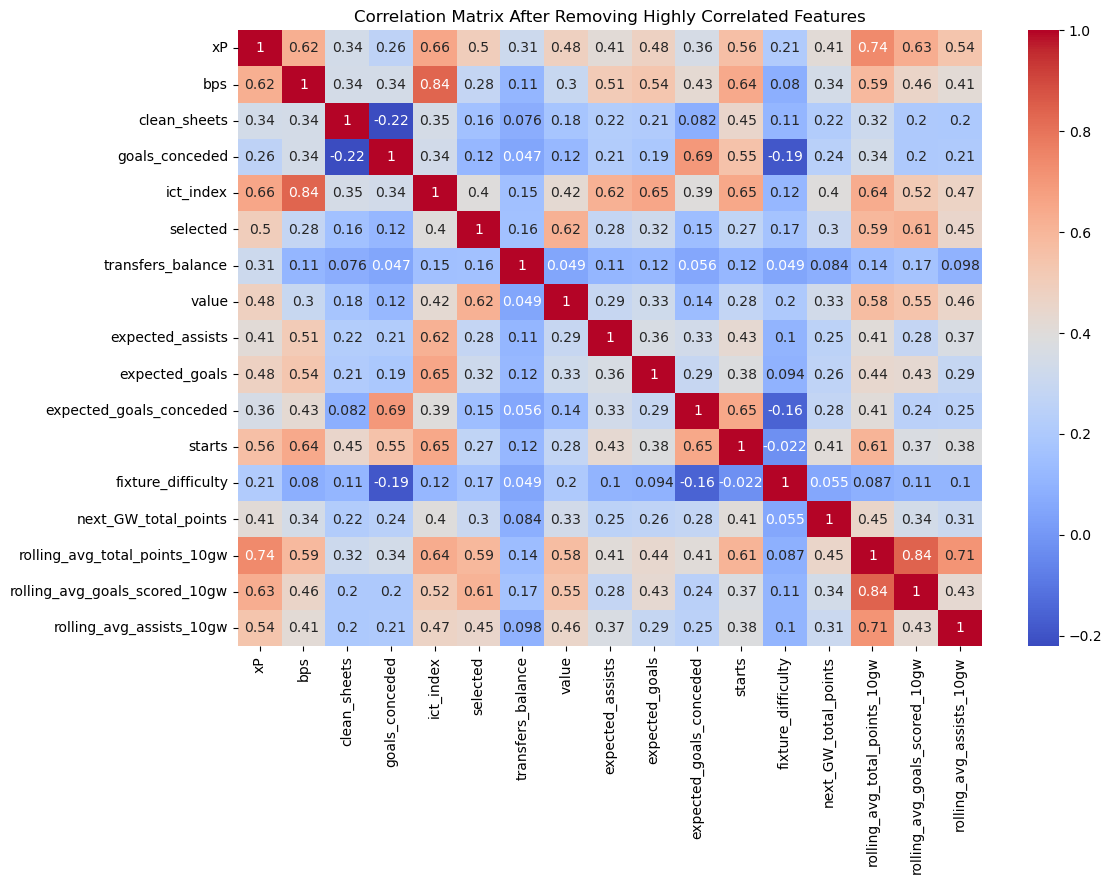

In [18]:
# Step 3: Check the correlation matrix again to see if there are any remaining highly correlated features
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix After Removing Highly Correlated Features')
plt.show()

In [364]:
df_mid_cleaned.to_csv('df_mid_cleaned.csv', index=False)


In [19]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Separate features and target
X_mid = df_mid_cleaned.drop(columns=['next_GW_total_points'])  # Features
y_mid = df_mid_cleaned['next_GW_total_points']  # Target (Total Points)

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features
X_mid_scaled = scaler.fit_transform(X_mid.select_dtypes(include=[float, int]))

# Create a DataFrame for scaled features
df_mid_scaled = pd.DataFrame(X_mid_scaled, columns=X_mid.select_dtypes(include=[float, int]).columns)

# Check the scaled data
print(df_mid_scaled.head())

         xP       bps  clean_sheets  goals_conceded  ict_index  selected  \
0 -0.244460  1.315276      2.632360       -0.581731   1.169435 -0.158927   
1  0.255845  0.616322     -0.379887        1.403027  -0.434124 -0.117043   
2  0.047385  0.516471     -0.379887        0.410648   0.715093 -0.176986   
3  0.589382  2.213930     -0.379887        1.403027   1.169435 -0.191903   
4  0.255845  0.216920     -0.379887        1.403027   0.020218 -0.207441   

   transfers_balance     value  expected_assists  expected_goals  \
0          -0.031876  0.030718          0.598256        0.115210   
1           0.059668  0.030718         -0.367275       -0.399782   
2          -0.473113  0.030718          0.783934        0.294859   
3          -0.182597  0.030718          0.969613       -0.076415   
4          -0.172888 -0.041373         -0.051620       -0.268040   

   expected_goals_conceded    starts  fixture_difficulty  \
0                 0.239916  1.184946           -0.138615   
1             

In [20]:
print(df_mid_scaled.columns)

Index(['xP', 'bps', 'clean_sheets', 'goals_conceded', 'ict_index', 'selected',
       'transfers_balance', 'value', 'expected_assists', 'expected_goals',
       'expected_goals_conceded', 'starts', 'fixture_difficulty',
       'rolling_avg_total_points_10gw', 'rolling_avg_goals_scored_10gw',
       'rolling_avg_assists_10gw'],
      dtype='object')


In [21]:
# Add missing columns back to the scaled dataframe from the original cleaned dataframe
df_mid_scaled['name'] = df_mid_cleaned['name']
df_mid_scaled['team'] = df_mid_cleaned['team']
df_mid_scaled['season'] = df_mid_cleaned['season']
df_mid_scaled['kickoff_time'] = df_mid_cleaned['kickoff_time']
df_mid_scaled['next_GW_total_points'] = df_mid_cleaned['next_GW_total_points']
df_mid_scaled['GW'] = df_mid_cleaned['GW']



# Check the updated columns to ensure everything is back
print(df_mid_scaled.columns)

Index(['xP', 'bps', 'clean_sheets', 'goals_conceded', 'ict_index', 'selected',
       'transfers_balance', 'value', 'expected_assists', 'expected_goals',
       'expected_goals_conceded', 'starts', 'fixture_difficulty',
       'rolling_avg_total_points_10gw', 'rolling_avg_goals_scored_10gw',
       'rolling_avg_assists_10gw', 'name', 'team', 'season', 'kickoff_time',
       'next_GW_total_points', 'GW'],
      dtype='object')


In [22]:
# Sort the data by kickoff_time to ensure time order
df_mid_final = df_mid_scaled.sort_values(by='kickoff_time')

# Use 70% of the data for training and 30% for testing
train_size = int(0.7 * len(df_mid_final))

# Split the data into training and test sets
train_data = df_mid_final[:train_size]
test_data = df_mid_final[train_size:]

# Check the split
print("Training set size:", len(train_data))
print("Test set size:", len(test_data))

Training set size: 14292
Test set size: 6126


In [23]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define features and target
features = ['xP', 'bps', 'clean_sheets', 'goals_conceded',
        'ict_index', 'selected', 'transfers_balance', 'value',
       'expected_assists', 'expected_goals', 'expected_goals_conceded',
       'starts', 'fixture_difficulty', 'rolling_avg_total_points_10gw',
       'rolling_avg_goals_scored_10gw', 'rolling_avg_assists_10gw']

target = 'next_GW_total_points'

# Prepare training data
X_train = train_data[features]
y_train = train_data[target]

# Prepare test data
X_test = test_data[features]
y_test = test_data[target]

# Initialize the XGBoost model
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)

# Train the model
xgboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgboost_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 2.370234156926586
MAE: 1.342501637254943


C:\Users\syeds\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


XGBoost - RMSE: 2.370234156926586, MAE: 1.342501637254943
Random Forest - RMSE: 2.3860580166245633, MAE: 1.4067198708082644
Gradient Boosting - RMSE: 2.3925048813127527, MAE: 1.3506924014742892
Ridge Regression - RMSE: 2.3542972411541587, MAE: 1.3670913617112637
ElasticNet - RMSE: 2.4740676364119403, MAE: 1.5761449562925633
SVR - RMSE: 2.448707633647372, MAE: 1.1797659842228798
KNeighbors - RMSE: 2.543336437647144, MAE: 1.4223963434541302
Neural Network (MLP) - RMSE: 2.9669438207194467, MAE: 1.770309115011495


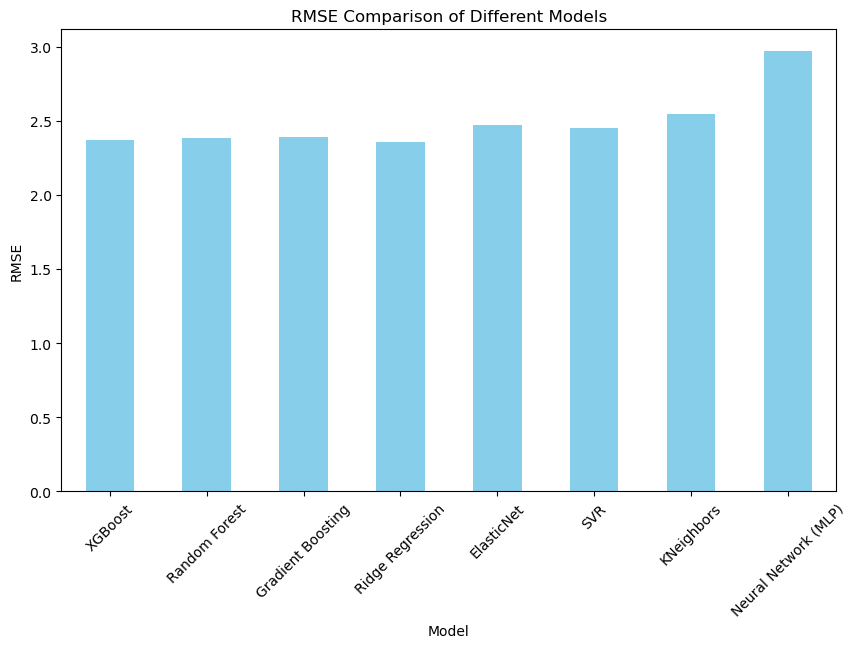

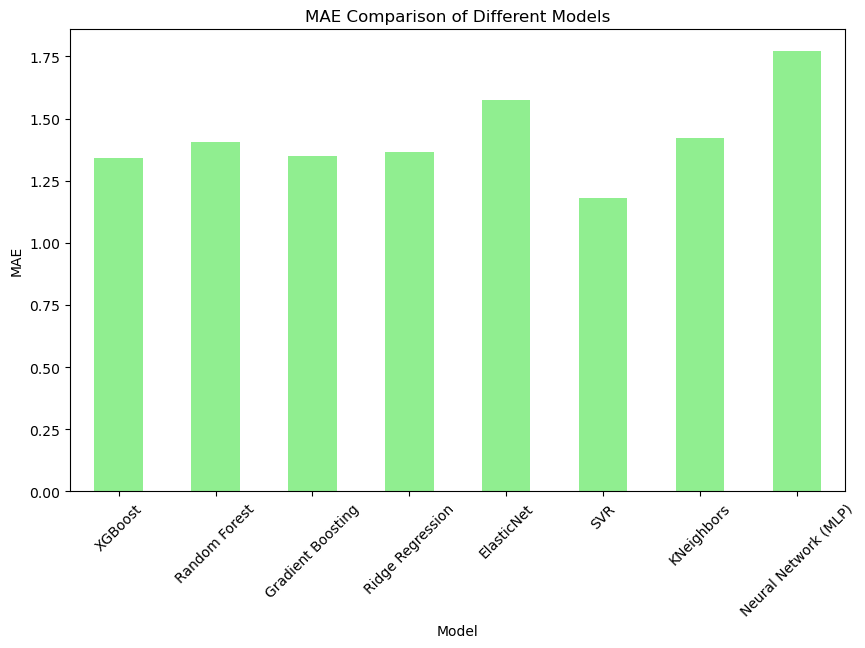

In [353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

# Define features and target
features = ['xP', 'bps', 'clean_sheets', 'goals_conceded',
        'ict_index', 'selected', 'transfers_balance', 'value',
       'expected_assists', 'expected_goals', 'expected_goals_conceded',
       'starts', 'fixture_difficulty', 'rolling_avg_total_points_10gw',
       'rolling_avg_goals_scored_10gw', 'rolling_avg_assists_10gw']

target = 'next_GW_total_points'

# Prepare training data
X_train = train_data[features]
y_train = train_data[target]

# Prepare test data
X_test = test_data[features]
y_test = test_data[target]

# Initialize and evaluate each model
models = {
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42),
    "Ridge Regression": Ridge(),
    "ElasticNet": ElasticNet(),
    "SVR": SVR(),
    "KNeighbors": KNeighborsRegressor(n_neighbors=5),
    "Neural Network (MLP)": MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
}

# Dictionary to store RMSE and MAE for each model
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    
    results[model_name] = {'RMSE': rmse, 'MAE': mae}
    print(f"{model_name} - RMSE: {rmse}, MAE: {mae}")

# Convert the results into a DataFrame for easy visualization
results_df = pd.DataFrame(results).T

# Plot RMSE comparison
plt.figure(figsize=(10, 6))
results_df['RMSE'].plot(kind='bar', color='skyblue')
plt.title('RMSE Comparison of Different Models')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

# Plot MAE comparison
plt.figure(figsize=(10, 6))
results_df['MAE'].plot(kind='bar', color='lightgreen')
plt.title('MAE Comparison of Different Models')
plt.ylabel('MAE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

Best parameters for high scorers model:  OrderedDict([('colsample_bytree', 0.5), ('gamma', 1), ('learning_rate', 0.01), ('max_depth', 3), ('min_child_weight', 1), ('n_estimators', 100), ('reg_alpha', 10), ('reg_lambda', 0.1), ('subsample', 0.5)])
Best parameters for low scorers model:  OrderedDict([('colsample_bytree', 0.5113262189713949), ('gamma', 0), ('learning_rate', 0.01), ('max_depth', 3), ('min_child_weight', 3), ('n_estimators', 1000), ('reg_alpha', 5), ('reg_lambda', 9.339412621893098), ('subsample', 1.0)])
Combined Model Test RMSE: 1.2865833500080506
                                 next_GW_total_points  Predicted
name                                                            
cole palmer                                  7.400000   6.175815
phil foden                                   6.068966   4.701274
bukayo saka                                  5.933333   5.727408
kai havertz                                  5.571429   5.050555
son heung min                              

C:\Users\syeds\AppData\Local\Temp\ipykernel_1380\1193737.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted'] = pd.concat([pd.Series(y_pred_high, index=high_scorers_test.index),


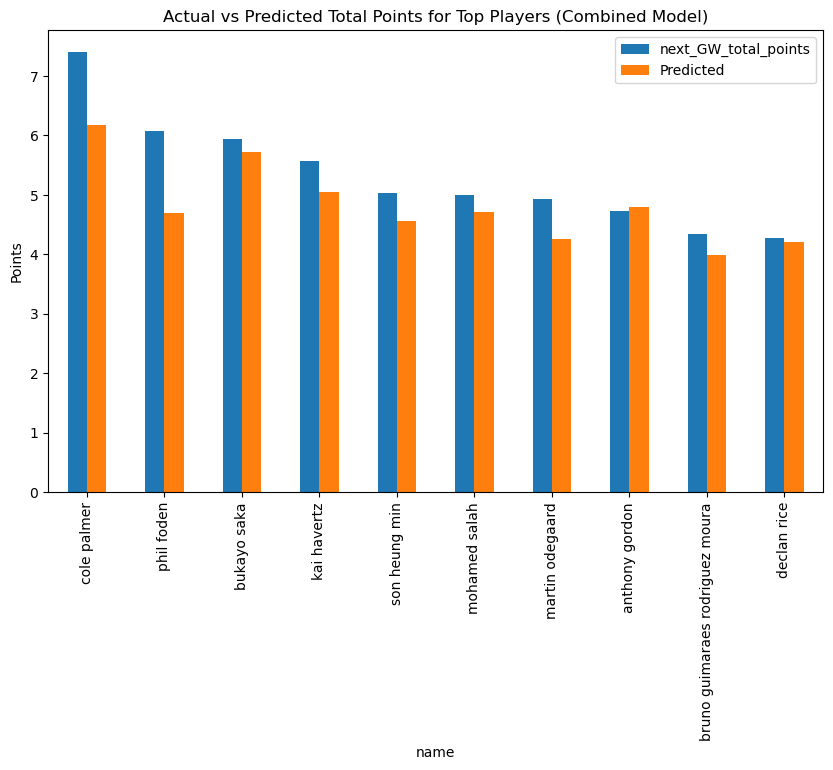

In [361]:
from skopt import BayesSearchCV
from xgboost import XGBRegressor
import numpy as np
import pandas as pd

# Remove prediction-related columns if they exist in the dataset
if 'Predicted' in test_data.columns:
    test_data = test_data.drop(columns=['Predicted'])

# Define a threshold to split players into high and low scorers (e.g., threshold = 7)
threshold = 6

# Split the data into high and low scoring players
high_scorers_train = train_data[train_data['next_GW_total_points'] >= threshold]
low_scorers_train = train_data[train_data['next_GW_total_points'] < threshold]

high_scorers_test = test_data[test_data['next_GW_total_points'] >= threshold]
low_scorers_test = test_data[test_data['next_GW_total_points'] < threshold]

# Define Bayesian Optimization search space (you can adjust this based on your specific needs)
param_space = {
    'learning_rate': (0.01, 0.3, 'log-uniform'),
    'max_depth': (3, 10),
    'n_estimators': (100, 1000),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0),
    'gamma': (0, 1),
    'reg_alpha': (0, 10),
    'reg_lambda': (0.1, 10),
    'min_child_weight': (1, 10)
}

# Define X_train and y_train for high and low scorers
X_train_high = high_scorers_train.drop(columns=['next_GW_total_points', 'name', 'team', 'kickoff_time', 'season', 'GW'])
y_train_high = high_scorers_train['next_GW_total_points']

X_train_low = low_scorers_train.drop(columns=['next_GW_total_points', 'name', 'team', 'kickoff_time', 'season', 'GW'])
y_train_low = low_scorers_train['next_GW_total_points']

X_test_high = high_scorers_test.drop(columns=['next_GW_total_points', 'name', 'team', 'kickoff_time', 'season', 'GW'])
y_test_high = high_scorers_test['next_GW_total_points']

X_test_low = low_scorers_test.drop(columns=['next_GW_total_points', 'name', 'team', 'kickoff_time', 'season', 'GW'])
y_test_low = low_scorers_test['next_GW_total_points']

# Bayesian optimization for high scorers model
opt_high = BayesSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42),
    search_spaces=param_space,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error',
    random_state=42
)

opt_high.fit(X_train_high, y_train_high)
best_params_high = opt_high.best_params_
print("Best parameters for high scorers model: ", best_params_high)

# Bayesian optimization for low scorers model
opt_low = BayesSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42),
    search_spaces=param_space,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error',
    random_state=42
)

opt_low.fit(X_train_low, y_train_low)
best_params_low = opt_low.best_params_
print("Best parameters for low scorers model: ", best_params_low)

# Re-train the high and low scorers models with the best parameters
best_xgb_high = XGBRegressor(**best_params_high, objective='reg:squarederror', random_state=42)
best_xgb_high.fit(X_train_high, y_train_high)

best_xgb_low = XGBRegressor(**best_params_low, objective='reg:squarederror', random_state=42)
best_xgb_low.fit(X_train_low, y_train_low)

# Make predictions for high and low scorers
y_pred_high = best_xgb_high.predict(X_test_high)
y_pred_low = best_xgb_low.predict(X_test_low)

# Combine predictions
test_data['Predicted'] = pd.concat([pd.Series(y_pred_high, index=high_scorers_test.index),
                                    pd.Series(y_pred_low, index=low_scorers_test.index)])

# Calculate RMSE for the combined model
y_test_combined = pd.concat([y_test_high, y_test_low])
y_pred_combined = test_data['Predicted']
rmse_combined = np.sqrt(np.mean((y_pred_combined - y_test_combined) ** 2))
print(f'Combined Model Test RMSE: {rmse_combined}')

# Show actual vs predicted for top players
top_players_combined = test_data.groupby('name').agg({'next_GW_total_points': 'mean', 'Predicted': 'mean'}).sort_values('next_GW_total_points', ascending=False).head(10)
print(top_players_combined)

# Plot actual vs predicted for top players
top_players_combined.plot(kind='bar', figsize=(10,6))
plt.title('Actual vs Predicted Total Points for Top Players (Combined Model)')
plt.ylabel('Points')
plt.show()


Best parameters for high scorers model:  OrderedDict([('colsample_bytree', 0.5), ('gamma', 1), ('learning_rate', 0.01), ('max_depth', 3), ('min_child_weight', 1), ('n_estimators', 100), ('reg_alpha', 10), ('reg_lambda', 0.1), ('subsample', 0.5)])
Best parameters for low scorers model:  OrderedDict([('colsample_bytree', 0.5113262189713949), ('gamma', 0), ('learning_rate', 0.01), ('max_depth', 3), ('min_child_weight', 3), ('n_estimators', 1000), ('reg_alpha', 5), ('reg_lambda', 9.339412621893098), ('subsample', 1.0)])


C:\Users\syeds\AppData\Local\Temp\ipykernel_44672\2551166615.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted'] = pd.concat([pd.Series(y_pred_high, index=high_scorers_test.index),


Combined Model Test RMSE: 1.2865833500080506
High Scorers Cross-Validation RMSE scores: [2.9605502  3.34821178 3.20659121 2.81773031 3.05771949]
Average High Scorers Cross-Validation RMSE: 3.0781605957795617
Low Scorers Cross-Validation RMSE scores: [1.00193187 0.98520483 0.99899969 0.90959423 0.98716858]
Average Low Scorers Cross-Validation RMSE: 0.9765798413747253
Mean Absolute Error (MAE): 2.190259262795186
R-squared: -0.7397751808166504
                                 next_GW_total_points  Predicted
name                                                            
cole palmer                                  7.400000   6.175815
phil foden                                   6.068966   4.701274
bukayo saka                                  5.933333   5.727408
kai havertz                                  5.571429   5.050555
son heung min                                5.033333   4.558218
mohamed salah                                5.000000   4.705656
martin odegaard                    

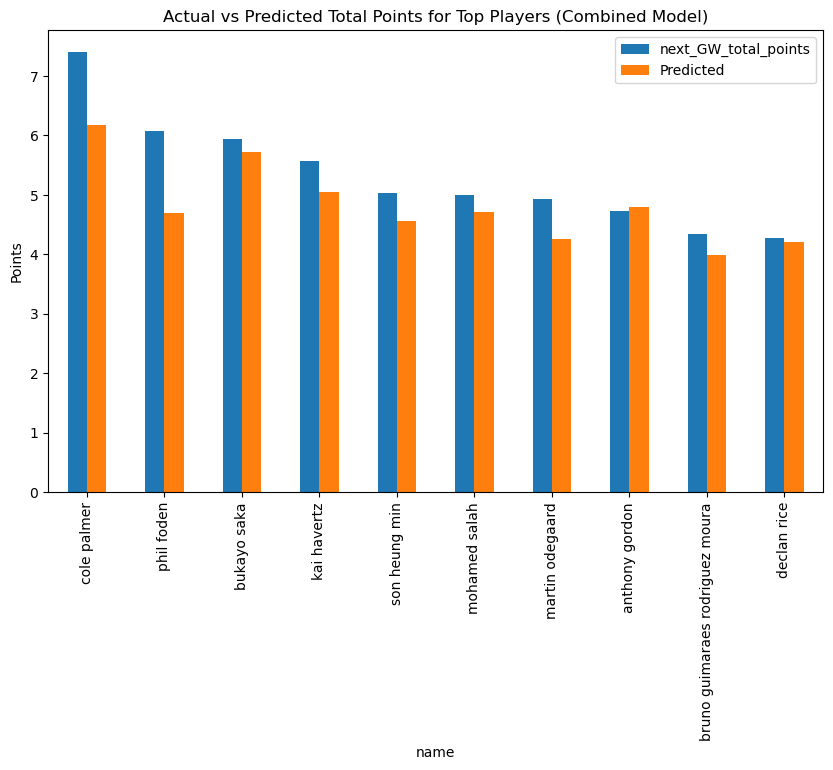

In [24]:
from skopt import BayesSearchCV
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Remove prediction-related columns if they exist in the dataset
if 'Predicted' in test_data.columns:
    test_data = test_data.drop(columns=['Predicted'])

# Define a threshold to split players into high and low scorers (e.g., threshold = 6)
threshold = 6

# Split the data into high and low scoring players
high_scorers_train = train_data[train_data['next_GW_total_points'] >= threshold]
low_scorers_train = train_data[train_data['next_GW_total_points'] < threshold]

high_scorers_test = test_data[test_data['next_GW_total_points'] >= threshold]
low_scorers_test = test_data[test_data['next_GW_total_points'] < threshold]

# Define Bayesian Optimization search space (you can adjust this based on your specific needs)
param_space = {
    'learning_rate': (0.01, 0.3, 'log-uniform'),
    'max_depth': (3, 10),
    'n_estimators': (100, 1000),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0),
    'gamma': (0, 1),
    'reg_alpha': (0, 10),
    'reg_lambda': (0.1, 10),
    'min_child_weight': (1, 10)
}

# Define X_train and y_train for high and low scorers
X_train_high = high_scorers_train.drop(columns=['next_GW_total_points', 'name', 'team', 'kickoff_time', 'season', 'GW'])
y_train_high = high_scorers_train['next_GW_total_points']

X_train_low = low_scorers_train.drop(columns=['next_GW_total_points', 'name', 'team', 'kickoff_time', 'season', 'GW'])
y_train_low = low_scorers_train['next_GW_total_points']

X_test_high = high_scorers_test.drop(columns=['next_GW_total_points', 'name', 'team', 'kickoff_time', 'season', 'GW'])
y_test_high = high_scorers_test['next_GW_total_points']

X_test_low = low_scorers_test.drop(columns=['next_GW_total_points', 'name', 'team', 'kickoff_time', 'season', 'GW'])
y_test_low = low_scorers_test['next_GW_total_points']

# Bayesian optimization for high scorers model
opt_high = BayesSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42),
    search_spaces=param_space,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error',
    random_state=42
)

opt_high.fit(X_train_high, y_train_high)
best_params_high = opt_high.best_params_
print("Best parameters for high scorers model: ", best_params_high)

# Bayesian optimization for low scorers model
opt_low = BayesSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42),
    search_spaces=param_space,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error',
    random_state=42
)

opt_low.fit(X_train_low, y_train_low)
best_params_low = opt_low.best_params_
print("Best parameters for low scorers model: ", best_params_low)

# Re-train the high and low scorers models with the best parameters
best_xgb_high = XGBRegressor(**best_params_high, objective='reg:squarederror', random_state=42)
best_xgb_high.fit(X_train_high, y_train_high)

best_xgb_low = XGBRegressor(**best_params_low, objective='reg:squarederror', random_state=42)
best_xgb_low.fit(X_train_low, y_train_low)

# Make predictions for high and low scorers
y_pred_high = best_xgb_high.predict(X_test_high)
y_pred_low = best_xgb_low.predict(X_test_low)

# Combine predictions
test_data['Predicted'] = pd.concat([pd.Series(y_pred_high, index=high_scorers_test.index),
                                    pd.Series(y_pred_low, index=low_scorers_test.index)])

# Calculate RMSE for the combined model
y_test_combined = pd.concat([y_test_high, y_test_low])
y_pred_combined = test_data['Predicted']
rmse_combined = np.sqrt(np.mean((y_pred_combined - y_test_combined) ** 2))
print(f'Combined Model Test RMSE: {rmse_combined}')

# Cross-Validation Scores for high scorers model (5-fold cross-validation)
cv_scores_high = cross_val_score(best_xgb_high, X_train_high, y_train_high, cv=5, scoring='neg_root_mean_squared_error')
print(f"High Scorers Cross-Validation RMSE scores: {-cv_scores_high}")
print(f"Average High Scorers Cross-Validation RMSE: {-cv_scores_high.mean()}")

# Cross-Validation Scores for low scorers model (5-fold cross-validation)
cv_scores_low = cross_val_score(best_xgb_low, X_train_low, y_train_low, cv=5, scoring='neg_root_mean_squared_error')
print(f"Low Scorers Cross-Validation RMSE scores: {-cv_scores_low}")
print(f"Average Low Scorers Cross-Validation RMSE: {-cv_scores_low.mean()}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_combined, y_pred_combined)
print(f'Mean Absolute Error (MAE): {mae}')

# R-squared
r2 = r2_score(y_test_combined, y_pred_combined)
print(f'R-squared: {r2}')

# Show actual vs predicted for top players
top_players_combined = test_data.groupby('name').agg({'next_GW_total_points': 'mean', 'Predicted': 'mean'}).sort_values('next_GW_total_points', ascending=False).head(10)
print(top_players_combined)

# Plot actual vs predicted for top players
top_players_combined.plot(kind='bar', figsize=(10,6))
plt.title('Actual vs Predicted Total Points for Top Players (Combined Model)')
plt.ylabel('Points')
plt.show()

In [362]:
# Save the trained models using joblib
joblib.dump(best_xgb_high, 'mid_xgb_high_model.pkl')
joblib.dump(best_xgb_low, 'mid_xgb_low_model.pkl')

['mid_xgb_low_model.pkl']

In [363]:
# Alternatively, save them as CSV files
train_data.to_csv('mid_train_data.csv', index=False)
test_data.to_csv('mid_test_data.csv', index=False)

print("Training and test datasets have been saved.")

Training and test datasets have been saved.


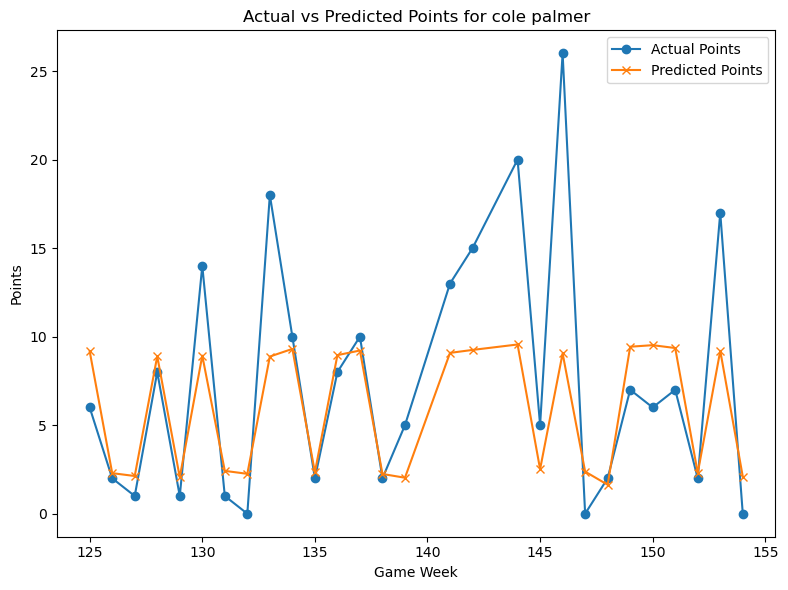

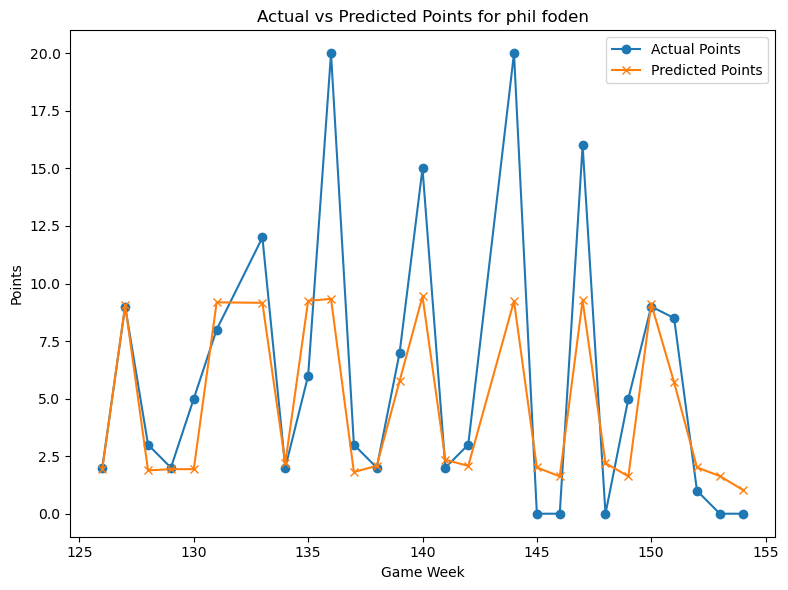

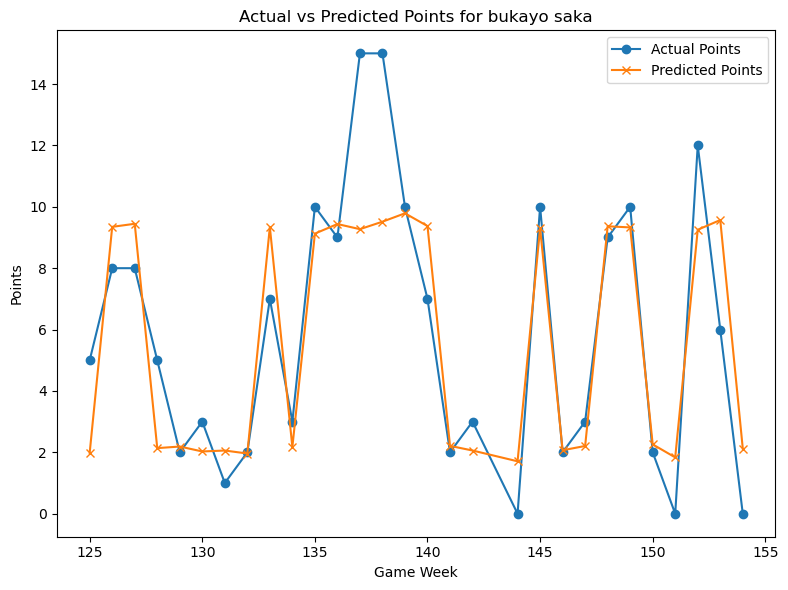

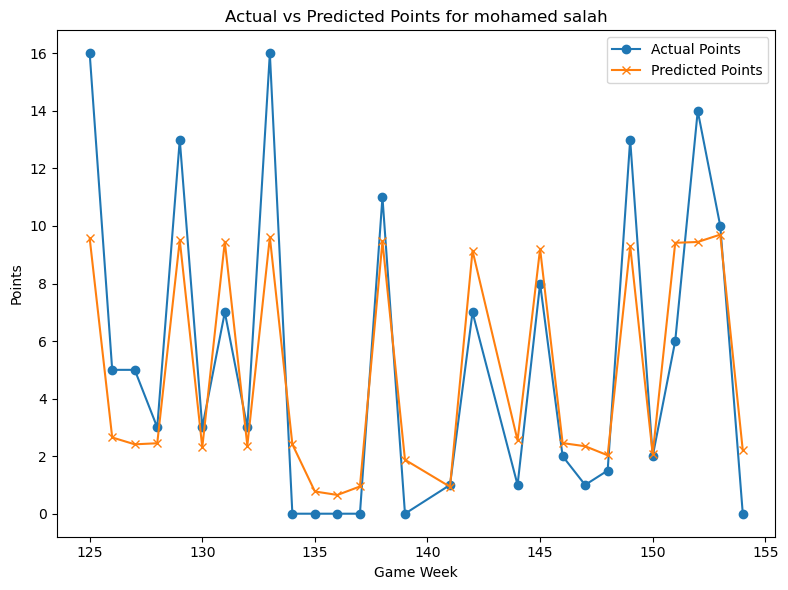

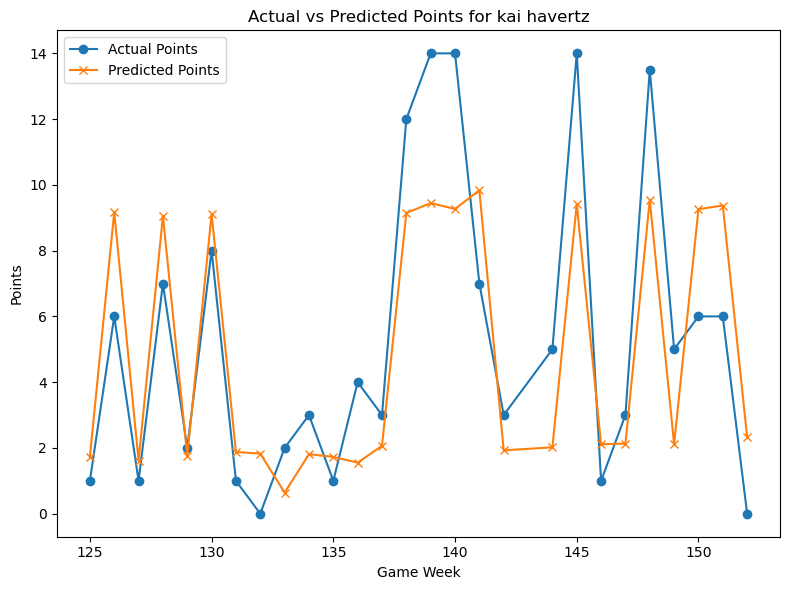

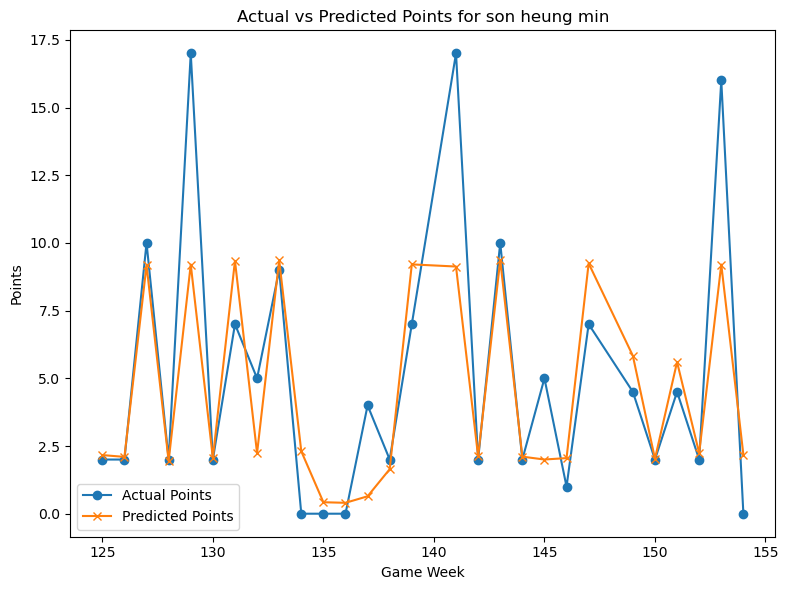

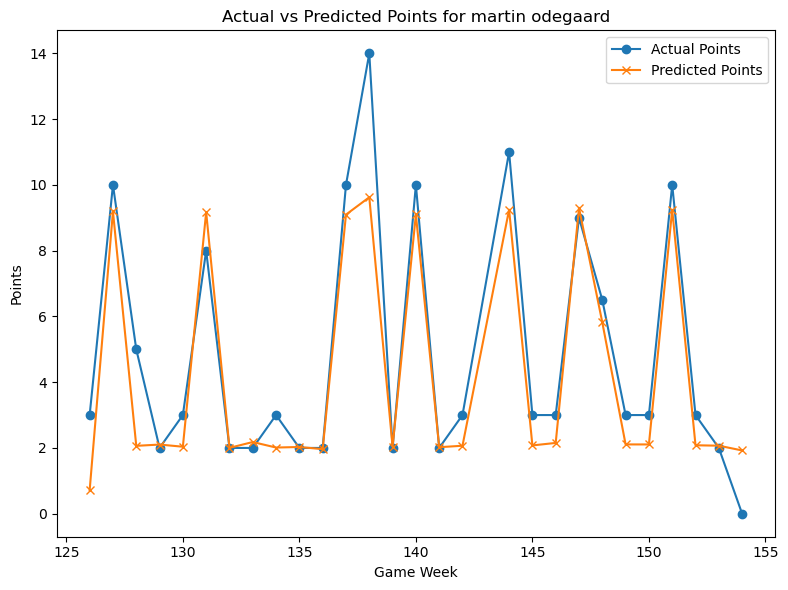

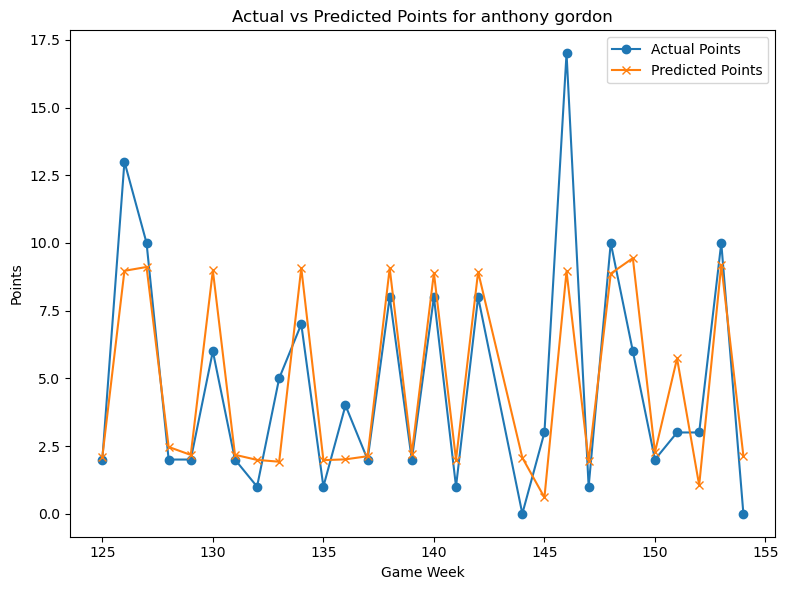

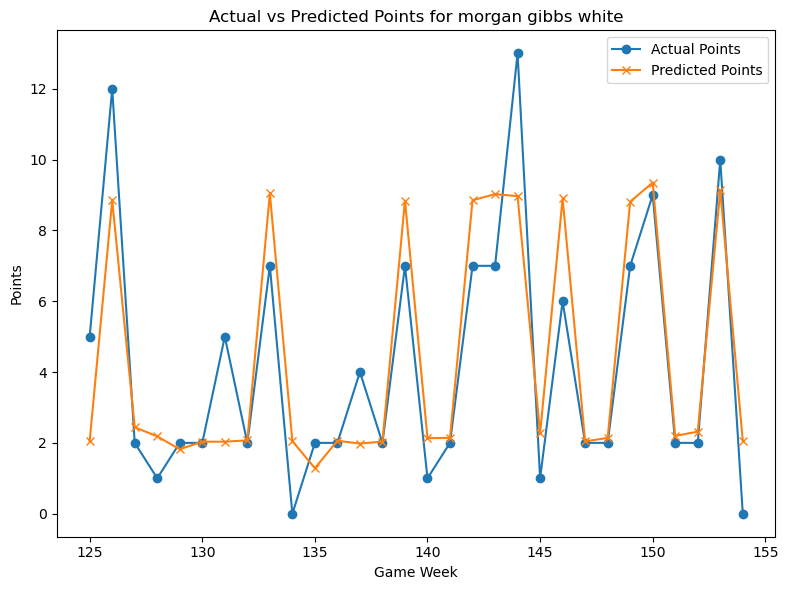

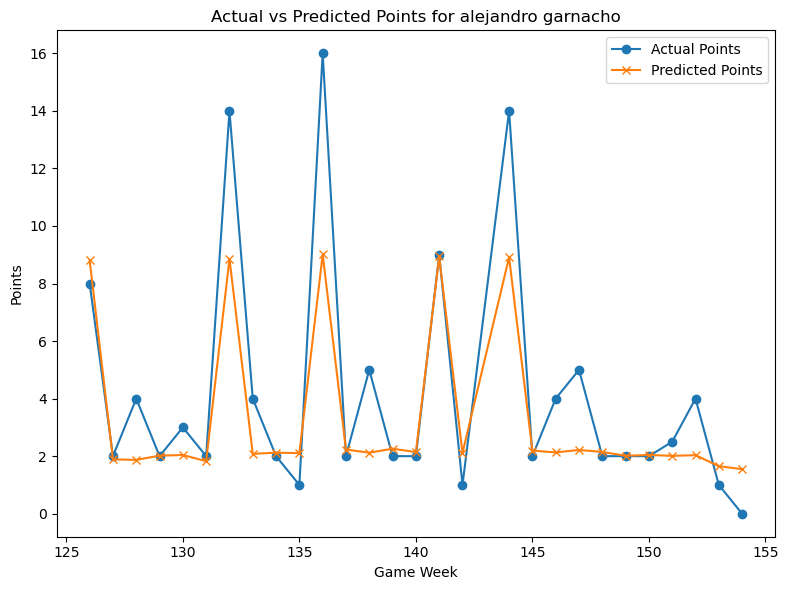

In [312]:
import matplotlib.pyplot as plt

# Group by game week and player, then calculate the average actual and predicted points
gw_performance = test_data.groupby(['GW', 'name']).agg({'next_GW_total_points': 'mean', 'Predicted': 'mean'}).reset_index()

# Get the top players by their actual total points
top_players_gws = gw_performance.groupby('name').agg({'next_GW_total_points': 'mean'}).sort_values('next_GW_total_points', ascending=False).head(10).index

# Filter the performance for these top players
top_gw_performance = gw_performance[gw_performance['name'].isin(top_players_gws)]

# Create a separate plot for each player
for player in top_players_gws:
    player_data = top_gw_performance[top_gw_performance['name'] == player]
    plt.figure(figsize=(8, 6))
    plt.plot(player_data['GW'], player_data['next_GW_total_points'], label=f'Actual Points', marker='o')
    plt.plot(player_data['GW'], player_data['Predicted'], label=f'Predicted Points', marker='x')
    plt.title(f'Actual vs Predicted Points for {player}')
    plt.xlabel('Game Week')
    plt.ylabel('Points')
    plt.legend()
    plt.tight_layout()
    plt.show()


C:\Users\syeds\AppData\Local\Temp\ipykernel_44672\4019970947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Residuals'] = test_data['next_GW_total_points'] - test_data['Predicted']


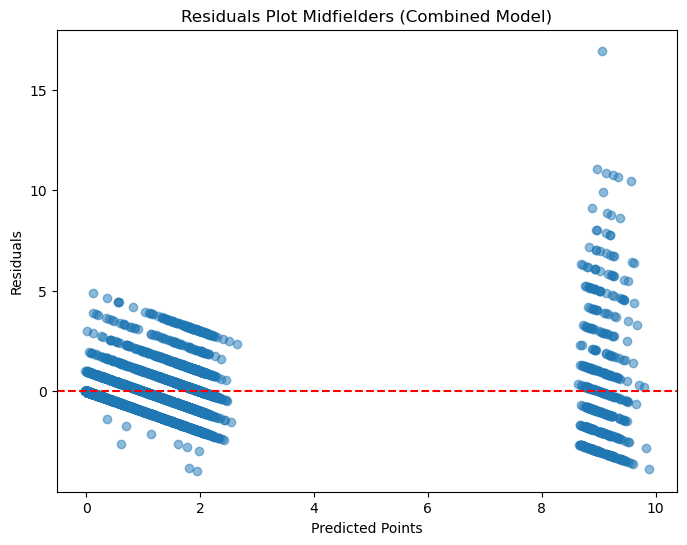

In [25]:
# Calculate residuals (actual - predicted)
test_data['Residuals'] = test_data['next_GW_total_points'] - test_data['Predicted']

# Residuals plot
plt.figure(figsize=(8, 6))
plt.scatter(test_data['Predicted'], test_data['Residuals'], alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot Midfielders (Combined Model)')
plt.xlabel('Predicted Points')
plt.ylabel('Residuals')
plt.show()

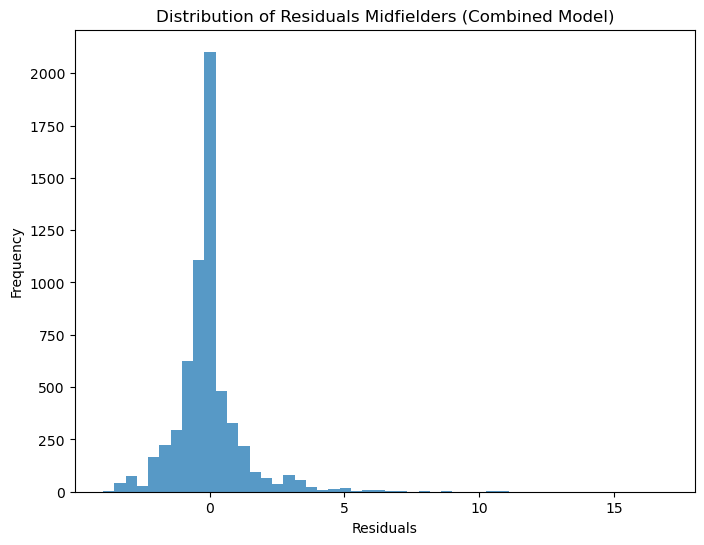

In [26]:
# Distribution of residuals
plt.figure(figsize=(8, 6))
plt.hist(test_data['Residuals'], bins=50, alpha=0.75)
plt.title('Distribution of Residuals Midfielders (Combined Model)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

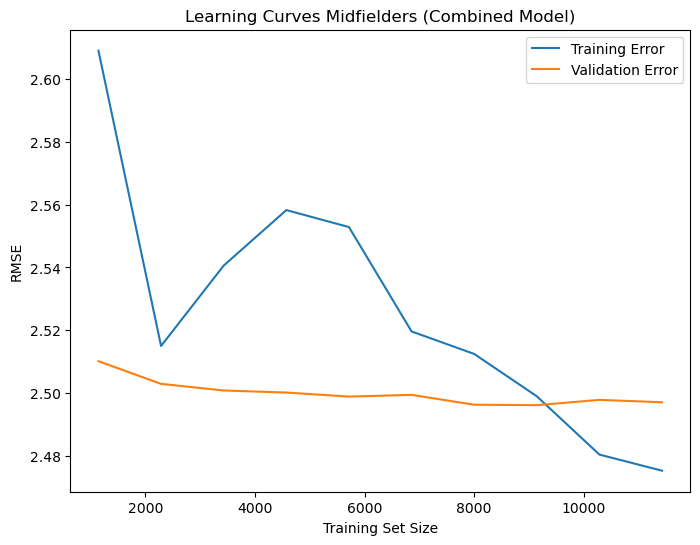

In [27]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Initialize the best_xgb model (assumes that best_params_high or best_params_low is already defined)
best_xgb = XGBRegressor(**best_params_high, objective='reg:squarederror', random_state=42)

# Train the model with all training data (if not done already)
best_xgb.fit(X_train, y_train)

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    best_xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

# Plot the learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.sqrt(train_scores_mean), label='Training Error')
plt.plot(train_sizes, np.sqrt(test_scores_mean), label='Validation Error')
plt.title('Learning Curves Midfielders (Combined Model)')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend()
plt.show()

<Figure size 1000x800 with 0 Axes>

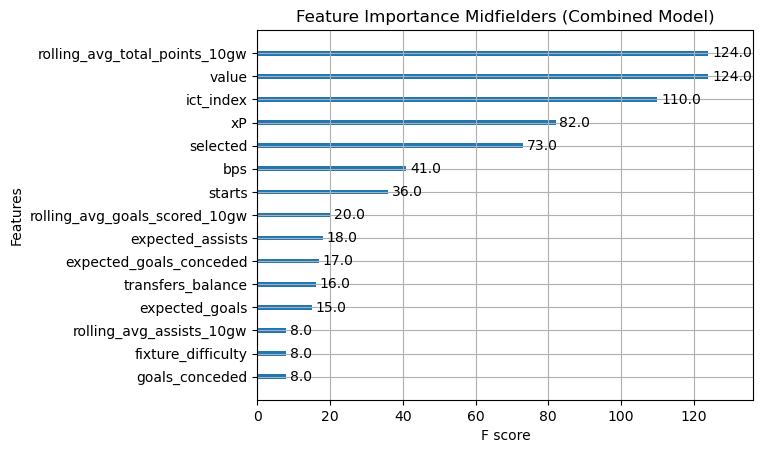

Cross-Validation RMSE scores: [2.48092078 2.63804722 2.66626394 2.31873136 2.36253164]
Average Cross-Validation RMSE: 2.4932989885091463
Mean Absolute Error (MAE): 1.342501637254943
R-squared: 0.24738848209381104


In [28]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Feature Importance
plt.figure(figsize=(10, 8))
plot_importance(best_xgb)
plt.title('Feature Importance Midfielders (Combined Model)')
plt.show()

# 2. Cross-Validation Scores (5-fold cross-validation)
cv_scores = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(f"Cross-Validation RMSE scores: {-cv_scores}")
print(f"Average Cross-Validation RMSE: {-cv_scores.mean()}")

# 3. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# 4. R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

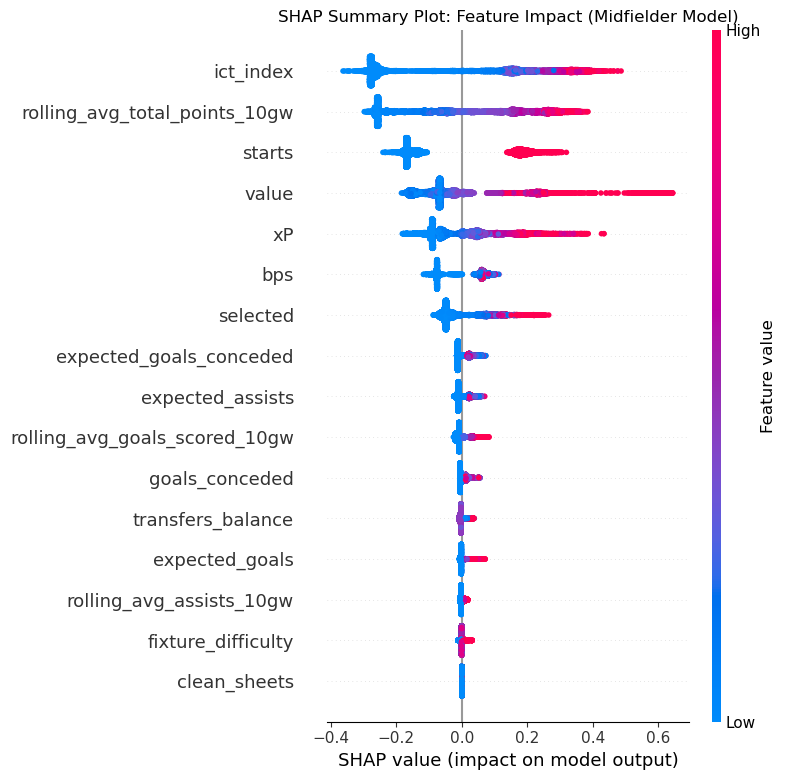

In [29]:
import shap

# Create a TreeExplainer for your XGBoost model
explainer = shap.TreeExplainer(best_xgb)

# Compute SHAP values for the same dataset (X_train) you're using
shap_values = explainer.shap_values(X_train)

# Generate SHAP dot plot (beeswarm plot)
shap.summary_plot(shap_values, X_train, plot_type="dot", show=False)

# Customize and display the plot
plt.title("SHAP Summary Plot: Feature Impact (Midfielder Model)")
plt.tight_layout()
plt.show()



In [325]:
import joblib

# Save the combined model to a file locally
model_filename = 'best_xgboost_Midmodel.pkl'
joblib.dump(best_xgb, model_filename)


['best_xgboost_Midmodel.pkl']

In [319]:
best_xgb = joblib.load('best_xgboost_Midmodel.pkl')
